In [1]:
import numpy as np
import pandas as pd
import re 
import matplotlib.pyplot as plt 
import sys
import time
from functools import reduce
import math
from numpy import inf
from ggplot import *

In [2]:
df1 = pd.read_excel('FunctionalAnnotationChartScore0.xlsx')
df2 = pd.read_excel('FunctionalAnnotationChartScore0_10.xlsx')
df3 = pd.read_excel('FunctionalAnnotationChartScore10_20.xlsx')
df4 = pd.read_excel('FunctionalAnnotationChartScore20_.xlsx')

In [3]:
data1=pd.DataFrame()
data1['Term']=df1['Term']
data1['PValue1']=df1['PValue']

In [4]:
data2=pd.DataFrame()
data2['Term']=df2['Term']
data2['PValue2']=df2['PValue']

In [5]:
data3=pd.DataFrame()
data3['Term']=df3['Term']
data3['PValue3']=df3['PValue']

In [6]:
data4=pd.DataFrame()
data4['Term']=df4['Term']
data4['PValue4']=df4['PValue']

In [20]:
newdata=pd.merge(data1, data2, on='Term',how="outer")
newdata=pd.merge(data3,newdata, on='Term', how='outer')
newdata=pd.merge(data4,newdata, on='Term', how='outer')
newdata.to_excel('test.xlsx')

In [21]:
newdata=newdata.fillna(0)

In [24]:
newdata

,Term,PValue4,PValue3,PValue1,PValue2
0,GO:0005576~extracellular region,3.837207e-16,9.062213e-30,3.273410e-12,4.816856e-192
1,GO:0043235~receptor complex,7.349024e-16,6.049244e-03,1.062509e-02,1.106335e-24
2,GO:0008305~integrin complex,8.858831e-11,0.000000e+00,2.983052e-08,0.000000e+00
3,GO:0009986~cell surface,1.599350e-09,1.272494e-05,5.802779e-35,2.875532e-72
4,GO:0070062~extracellular exosome,1.107243e-08,1.052709e-07,2.008840e-02,2.742087e-21
...,...,...,...,...,...
122,GO:0016012~sarcoglycan complex,0.000000e+00,0.000000e+00,0.000000e+00,4.478983e-02
123,GO:0046696~lipopolysaccharide receptor complex,0.000000e+00,0.000000e+00,0.000000e+00,4.478983e-02
124,GO:0031089~platelet dense granule lumen,0.000000e+00,0.000000e+00,0.000000e+00,4.614902e-02
125,GO:0031988~membrane-bounded vesicle,0.000000e+00,0.000000e+00,0.000000e+00,4.614902e-02


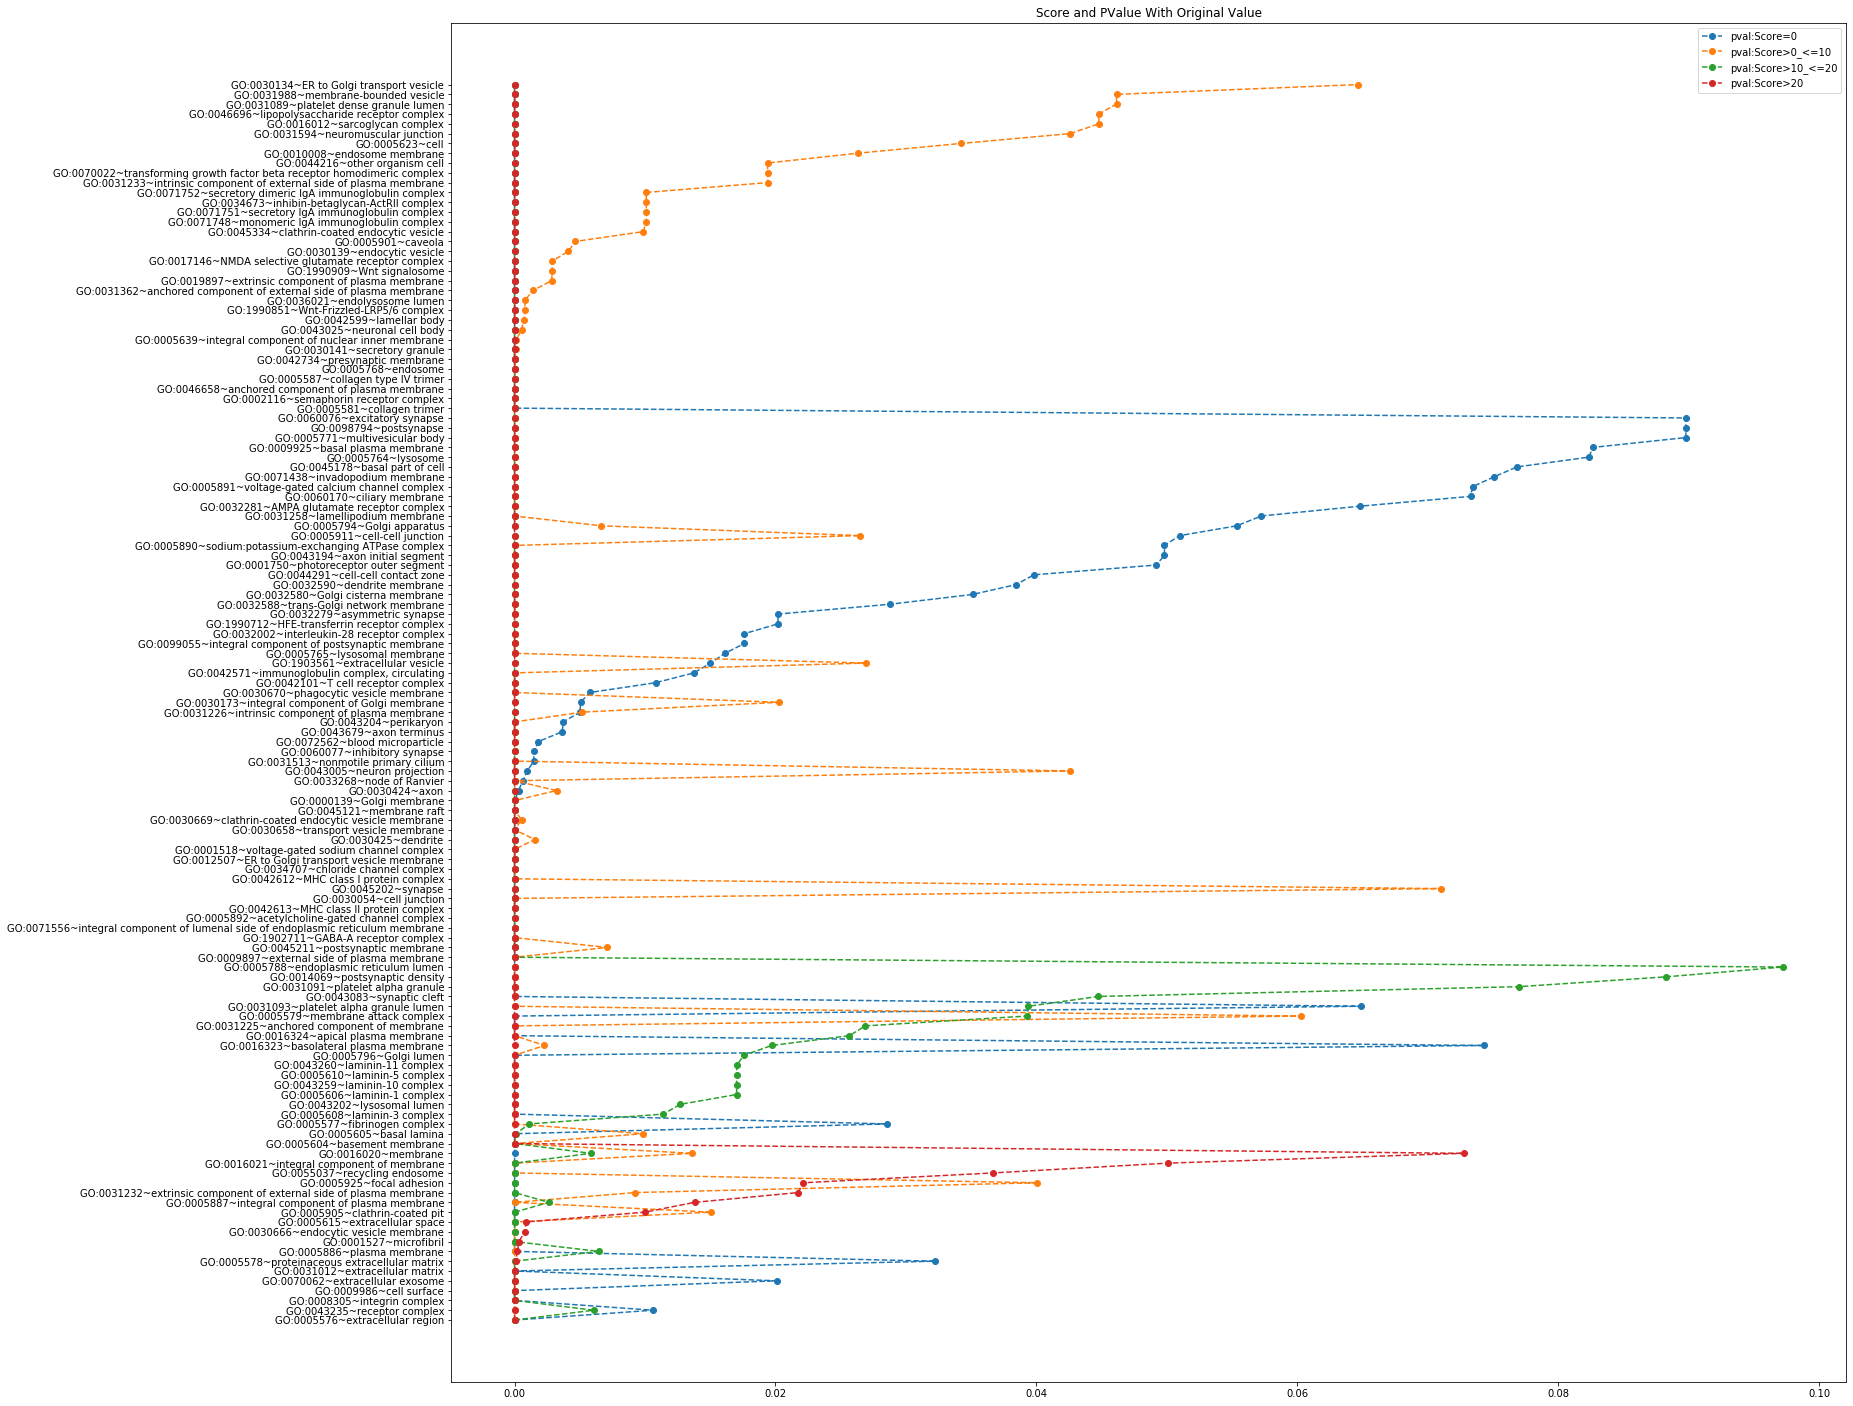

In [22]:
newdata.to_excel('AllClusterScores(AcutalValue).xlsx')
plt.figure(figsize=(25,25))
plt.plot( newdata['PValue1'],newdata['Term'], linestyle='--', marker='o')
plt.plot( newdata['PValue2'],newdata['Term'], linestyle='--', marker='o')
plt.plot( newdata['PValue3'],newdata['Term'], linestyle='--', marker='o')
plt.plot( newdata['PValue4'],newdata['Term'], linestyle='--', marker='o')

labels=['pval:Score=0','pval:Score>0_<=10','pval:Score>10_<=20','pval:Score>20']
plt.legend(labels)
plt.title('Score and PValue With Original Value')
plt.savefig('PValue Comparison Plot(Actual Value).jpg')

In [25]:
newdata['PValue1']=-np.log10(newdata['PValue1'])
newdata['PValue2']=-np.log10(newdata['PValue2'])
newdata['PValue3']=-np.log10(newdata['PValue3'])
newdata['PValue4']=-np.log10(newdata['PValue4'])

newdata['PValue1'].replace(np.inf, 0, inplace=True)
newdata['PValue2'].replace(np.inf, 0, inplace=True)
newdata['PValue3'].replace(np.inf, 0, inplace=True)
newdata['PValue4'].replace(np.inf, 0, inplace=True)

C:\Users\Amritpal Singh\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


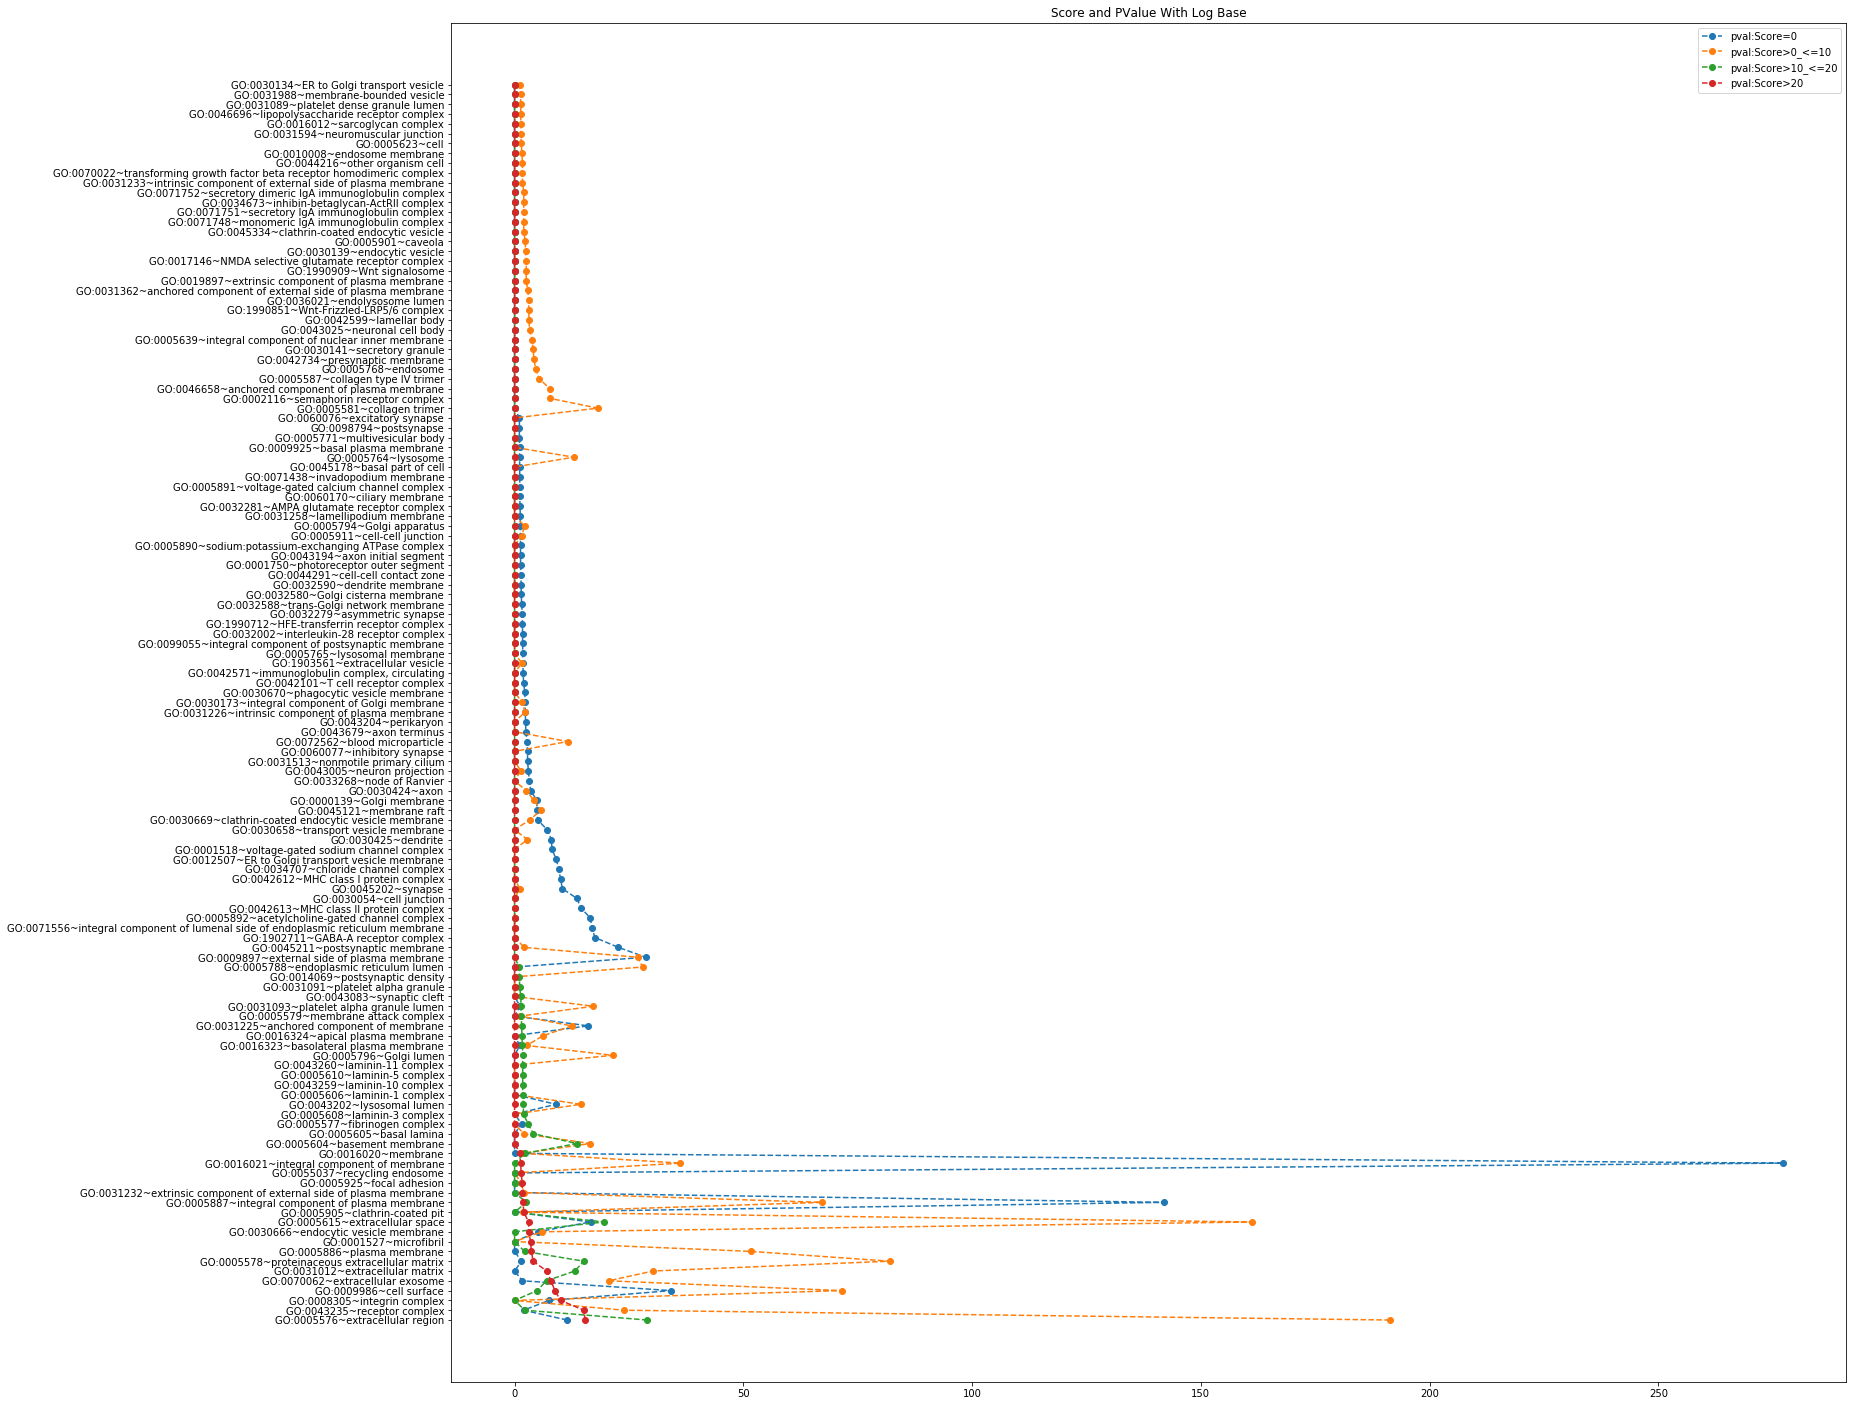

In [26]:
plt.figure(figsize=(25,25))
plt.plot( newdata['PValue1'],newdata['Term'], linestyle='--', marker='o')
plt.plot( newdata['PValue2'],newdata['Term'], linestyle='--', marker='o')
plt.plot( newdata['PValue3'],newdata['Term'], linestyle='--', marker='o')
plt.plot( newdata['PValue4'],newdata['Term'], linestyle='--', marker='o')

labels=['pval:Score=0','pval:Score>0_<=10','pval:Score>10_<=20','pval:Score>20']
plt.legend(labels)
plt.title('Score and PValue With Log Base')
plt.savefig('PValue Comparison Plot(Log Value).jpg')

In [27]:
newdata.to_excel('AllClusterScores(Log).xlsx')